# 기본 케라스 구조 및 콜백 함수

### 0. 사용할 패키지 불러오기

In [1]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
import tensorflow as tf

np.random.seed(3)

#### 사용자 정의 히스토리 클래스 정의 

In [2]:
class CustomHistory(tf.keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        self.train_accuracy = []
        self.val_accuracy = []    
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_accuracy.append(logs.get('accuracy'))      # accuracy
        self.val_accuracy.append(logs.get('val_accuracy'))

### 1. 데이터셋 생성하기
* 원본 데이터를 불러오거나 시뮬레이션을 통해 데이터를 생성합니다.
* 데이터로부터 훈련셋, 검증셋, 시험셋을 생성합니다.
* 이 때 딥러닝 모델의 학습 및 평가를 할 수 있도록 포맷 변환을 합니다.

#### 1.1 훈련셋과 시험셋 로딩

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]        
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
print('X_train', X_train.shape)
print('X_train', Y_train.shape)
print('X_train', X_val.shape)
print('X_train', Y_val.shape)

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

X_train (50000, 28, 28)
X_train (50000,)
X_train (10000, 28, 28)
X_train (10000,)


#### 1.2 훈련셋, 검증셋 고르기

In [4]:
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

#### 1.3 라벨 데이터 원핫인코딩 처리

In [5]:
Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

### 2. 모델 구성하기
* 시퀀스 모델을 생성한 뒤 필요한 레이어를 추가하여 구성합니다.
* 좀 더 복잡한 모델이 필요할 때는 케라스 함수 API를 사용합니다.

In [6]:
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


### 3. 모델 학습과정 설정하기
* 학습하기 전에 학습에 대한 설정을 수행합니다.
* 손실 함수 및 최적화 방법을 정의합니다.
* 케라스에서는 compile() 함수를 사용합니다.

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### 4. 모델 학습시키기
* 훈련셋을 이용하여 구성한 모델로 학습시킵니다.
* 케라스에서는 fit() 함수를 사용합니다.
#### 4.1 배치사이즈
* 몇 개를  처리하고 해답을 맞추는지를 의미함 
    * 100 : 100개를 처리하고 해답을 맞춤
    * 1: 1개를 처리하고 해답을 맞춤
* 배치사이즈가 작을수록 갱신이 자주 발생함 
#### 4.2 에폭
* 같은 데이터셋으로 반복적으로 가중치를 갱신하면서 학습
* 서로 다른 20문제를 1번 푸는 경우보다 같은 1문제를 20번 푸는 경우 정확도가 높다.

In [8]:
custom_hist = CustomHistory()
custom_hist.init()

for epoch_idx in range(1000):
    print('epoch : ' + str(epoch_idx))
    model.fit(X_train, Y_train, epochs=1, batch_size=10, validation_data=(X_val, Y_val), callbacks=[custom_hist])

epoch : 0
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 1s 826us/sample - loss: 2.1177 - accuracy: 0.2900 - val_loss: 1.8766 - val_accuracy: 0.5400
epoch : 1
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 189us/sample - loss: 1.6588 - accuracy: 0.6243 - val_loss: 1.4755 - val_accuracy: 0.6867
epoch : 2
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 197us/sample - loss: 1.3006 - accuracy: 0.7129 - val_loss: 1.1850 - val_accuracy: 0.7667
epoch : 3
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 204us/sample - loss: 1.0465 - accuracy: 0.7786 - val_loss: 0.9889 - val_accuracy: 0.7900
epoch : 4
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 186us/sample - loss: 0.8779 - accuracy: 0.8029 - val_loss: 0.8548 - val_accuracy: 0.8167
epoch : 5
Train on 700 samples, validate on 3

700/700 [==============================] - 0s 189us/sample - loss: 0.1284 - accuracy: 0.9800 - val_loss: 0.4750 - val_accuracy: 0.8467
epoch : 43
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 185us/sample - loss: 0.1241 - accuracy: 0.9800 - val_loss: 0.4741 - val_accuracy: 0.8500
epoch : 44
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 185us/sample - loss: 0.1208 - accuracy: 0.9857 - val_loss: 0.4728 - val_accuracy: 0.8500
epoch : 45
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 184us/sample - loss: 0.1171 - accuracy: 0.9843 - val_loss: 0.4763 - val_accuracy: 0.8533
epoch : 46
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 184us/sample - loss: 0.1137 - accuracy: 0.9857 - val_loss: 0.4794 - val_accuracy: 0.8467
epoch : 47
Train on 700 samples, validate on 300 samples
700/700 [==============================]

epoch : 85
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 182us/sample - loss: 0.0468 - accuracy: 1.0000 - val_loss: 0.5131 - val_accuracy: 0.8333
epoch : 86
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 187us/sample - loss: 0.0459 - accuracy: 1.0000 - val_loss: 0.5158 - val_accuracy: 0.8400
epoch : 87
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 197us/sample - loss: 0.0452 - accuracy: 1.0000 - val_loss: 0.5156 - val_accuracy: 0.8400
epoch : 88
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 187us/sample - loss: 0.0443 - accuracy: 1.0000 - val_loss: 0.5158 - val_accuracy: 0.8367
epoch : 89
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 185us/sample - loss: 0.0437 - accuracy: 1.0000 - val_loss: 0.5183 - val_accuracy: 0.8367
epoch : 90
Train on 700 samples, validat

700/700 [==============================] - 0s 192us/sample - loss: 0.0254 - accuracy: 1.0000 - val_loss: 0.5449 - val_accuracy: 0.8367
epoch : 128
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 215us/sample - loss: 0.0251 - accuracy: 1.0000 - val_loss: 0.5443 - val_accuracy: 0.8367
epoch : 129
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 204us/sample - loss: 0.0248 - accuracy: 1.0000 - val_loss: 0.5468 - val_accuracy: 0.8367
epoch : 130
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 191us/sample - loss: 0.0244 - accuracy: 1.0000 - val_loss: 0.5455 - val_accuracy: 0.8400
epoch : 131
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 198us/sample - loss: 0.0242 - accuracy: 1.0000 - val_loss: 0.5470 - val_accuracy: 0.8400
epoch : 132
Train on 700 samples, validate on 300 samples
700/700 [==========================

epoch : 170
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 182us/sample - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.5684 - val_accuracy: 0.8333
epoch : 171
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 181us/sample - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.5683 - val_accuracy: 0.8400
epoch : 172
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 189us/sample - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.5690 - val_accuracy: 0.8367
epoch : 173
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 184us/sample - loss: 0.0159 - accuracy: 1.0000 - val_loss: 0.5694 - val_accuracy: 0.8400
epoch : 174
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 194us/sample - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.5704 - val_accuracy: 0.8400
epoch : 175
Train on 700 samples, v

700/700 [==============================] - 0s 194us/sample - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.5868 - val_accuracy: 0.8367
epoch : 213
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 185us/sample - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.5866 - val_accuracy: 0.8367
epoch : 214
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 186us/sample - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.5875 - val_accuracy: 0.8367
epoch : 215
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 185us/sample - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.5878 - val_accuracy: 0.8400
epoch : 216
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 198us/sample - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.5887 - val_accuracy: 0.8400
epoch : 217
Train on 700 samples, validate on 300 samples
700/700 [==========================

epoch : 255
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 189us/sample - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.6022 - val_accuracy: 0.8433
epoch : 256
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 187us/sample - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.6024 - val_accuracy: 0.8400
epoch : 257
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 182us/sample - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.6032 - val_accuracy: 0.8400
epoch : 258
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 181us/sample - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.6033 - val_accuracy: 0.8400
epoch : 259
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 181us/sample - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.6037 - val_accuracy: 0.8400
epoch : 260
Train on 700 samples, v

700/700 [==============================] - 0s 184us/sample - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.6147 - val_accuracy: 0.8433
epoch : 298
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 184us/sample - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.6157 - val_accuracy: 0.8433
epoch : 299
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 184us/sample - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.6159 - val_accuracy: 0.8433
epoch : 300
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 188us/sample - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.6163 - val_accuracy: 0.8433
epoch : 301
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 182us/sample - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.6161 - val_accuracy: 0.8433
epoch : 302
Train on 700 samples, validate on 300 samples
700/700 [==========================

epoch : 340
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 182us/sample - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.6270 - val_accuracy: 0.8433
epoch : 341
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 181us/sample - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.6270 - val_accuracy: 0.8433
epoch : 342
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 184us/sample - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.6273 - val_accuracy: 0.8433
epoch : 343
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 188us/sample - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.6278 - val_accuracy: 0.8433
epoch : 344
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 188us/sample - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.6283 - val_accuracy: 0.8433
epoch : 345
Train on 700 samples, v

700/700 [==============================] - 0s 192us/sample - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.6368 - val_accuracy: 0.8433
epoch : 383
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 198us/sample - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.6371 - val_accuracy: 0.8433
epoch : 384
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 185us/sample - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.6374 - val_accuracy: 0.8433
epoch : 385
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 189us/sample - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.6374 - val_accuracy: 0.8433
epoch : 386
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 182us/sample - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.6376 - val_accuracy: 0.8433
epoch : 387
Train on 700 samples, validate on 300 samples
700/700 [==========================

epoch : 425
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 187us/sample - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.6460 - val_accuracy: 0.8433
epoch : 426
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 182us/sample - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.6462 - val_accuracy: 0.8433
epoch : 427
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 182us/sample - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.6466 - val_accuracy: 0.8433
epoch : 428
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 190us/sample - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.6468 - val_accuracy: 0.8433
epoch : 429
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 191us/sample - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.6470 - val_accuracy: 0.8433
epoch : 430
Train on 700 samples, v

700/700 [==============================] - 0s 191us/sample - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.6543 - val_accuracy: 0.8433
epoch : 468
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 188us/sample - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.6546 - val_accuracy: 0.8433
epoch : 469
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 180us/sample - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.6546 - val_accuracy: 0.8433
epoch : 470
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 185us/sample - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.6549 - val_accuracy: 0.8433
epoch : 471
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 184us/sample - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.6550 - val_accuracy: 0.8433
epoch : 472
Train on 700 samples, validate on 300 samples
700/700 [==========================

epoch : 510
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 184us/sample - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.6618 - val_accuracy: 0.8433
epoch : 511
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 185us/sample - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.6620 - val_accuracy: 0.8433
epoch : 512
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 185us/sample - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.6623 - val_accuracy: 0.8433
epoch : 513
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 184us/sample - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.6623 - val_accuracy: 0.8433
epoch : 514
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 185us/sample - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.6625 - val_accuracy: 0.8433
epoch : 515
Train on 700 samples, v

700/700 [==============================] - 0s 189us/sample - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.6688 - val_accuracy: 0.8433
epoch : 553
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 187us/sample - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.6690 - val_accuracy: 0.8433
epoch : 554
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 191us/sample - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.6691 - val_accuracy: 0.8433
epoch : 555
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 181us/sample - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.6692 - val_accuracy: 0.8433
epoch : 556
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 191us/sample - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.6694 - val_accuracy: 0.8433
epoch : 557
Train on 700 samples, validate on 300 samples
700/700 [==========================

epoch : 595
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 195us/sample - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.6753 - val_accuracy: 0.8433
epoch : 596
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 191us/sample - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.6754 - val_accuracy: 0.8433
epoch : 597
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 189us/sample - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.6755 - val_accuracy: 0.8433
epoch : 598
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 188us/sample - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.6756 - val_accuracy: 0.8433
epoch : 599
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 188us/sample - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.6758 - val_accuracy: 0.8433
epoch : 600
Train on 700 samples, v

700/700 [==============================] - 0s 188us/sample - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.6810 - val_accuracy: 0.8433
epoch : 638
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 188us/sample - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.6812 - val_accuracy: 0.8433
epoch : 639
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 189us/sample - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.6814 - val_accuracy: 0.8433
epoch : 640
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 187us/sample - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.6814 - val_accuracy: 0.8433
epoch : 641
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 193us/sample - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.6816 - val_accuracy: 0.8433
epoch : 642
Train on 700 samples, validate on 300 samples
700/700 [==========================

epoch : 680
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 184us/sample - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.6868 - val_accuracy: 0.8433
epoch : 681
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 187us/sample - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.6870 - val_accuracy: 0.8433
epoch : 682
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 189us/sample - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.6871 - val_accuracy: 0.8433
epoch : 683
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 188us/sample - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.6872 - val_accuracy: 0.8433
epoch : 684
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 188us/sample - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.6873 - val_accuracy: 0.8433
epoch : 685
Train on 700 samples, v

700/700 [==============================] - 0s 197us/sample - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.6920 - val_accuracy: 0.8433
epoch : 723
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 182us/sample - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.6920 - val_accuracy: 0.8433
epoch : 724
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 186us/sample - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.6922 - val_accuracy: 0.8433
epoch : 725
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 192us/sample - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.6923 - val_accuracy: 0.8433
epoch : 726
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 189us/sample - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.6924 - val_accuracy: 0.8433
epoch : 727
Train on 700 samples, validate on 300 samples
700/700 [==========================

epoch : 765
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 184us/sample - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.6968 - val_accuracy: 0.8433
epoch : 766
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 182us/sample - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.6970 - val_accuracy: 0.8433
epoch : 767
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 194us/sample - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.6971 - val_accuracy: 0.8433
epoch : 768
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 189us/sample - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.6972 - val_accuracy: 0.8433
epoch : 769
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 186us/sample - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.6972 - val_accuracy: 0.8433
epoch : 770
Train on 700 samples, v

700/700 [==============================] - 0s 188us/sample - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.7014 - val_accuracy: 0.8433
epoch : 808
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 189us/sample - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.7015 - val_accuracy: 0.8433
epoch : 809
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 187us/sample - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.7016 - val_accuracy: 0.8433
epoch : 810
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 184us/sample - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.7017 - val_accuracy: 0.8433
epoch : 811
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 189us/sample - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.7018 - val_accuracy: 0.8433
epoch : 812
Train on 700 samples, validate on 300 samples
700/700 [==========================

epoch : 850
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 212us/sample - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.7058 - val_accuracy: 0.8433
epoch : 851
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 198us/sample - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.7059 - val_accuracy: 0.8433
epoch : 852
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 185us/sample - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.7060 - val_accuracy: 0.8433
epoch : 853
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 189us/sample - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.7061 - val_accuracy: 0.8433
epoch : 854
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 191us/sample - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.7063 - val_accuracy: 0.8433
epoch : 855
Train on 700 samples, v

700/700 [==============================] - 0s 199us/sample - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.7100 - val_accuracy: 0.8467
epoch : 893
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 187us/sample - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.7101 - val_accuracy: 0.8467
epoch : 894
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 199us/sample - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.7102 - val_accuracy: 0.8467
epoch : 895
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 237us/sample - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.7103 - val_accuracy: 0.8467
epoch : 896
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 182us/sample - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.7104 - val_accuracy: 0.8467
epoch : 897
Train on 700 samples, validate on 300 samples
700/700 [==========================

700/700 [==============================] - 0s 198us/sample - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.7138 - val_accuracy: 0.8467
epoch : 935
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 193us/sample - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.7140 - val_accuracy: 0.8467
epoch : 936
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 195us/sample - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.7141 - val_accuracy: 0.8467
epoch : 937
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 194us/sample - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.7142 - val_accuracy: 0.8467
epoch : 938
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 187us/sample - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.7143 - val_accuracy: 0.8467
epoch : 939
Train on 700 samples, validate on 300 samples
700/700 [==========================

epoch : 977
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 188us/sample - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.7177 - val_accuracy: 0.8467
epoch : 978
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 189us/sample - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.7178 - val_accuracy: 0.8467
epoch : 979
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 188us/sample - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.7179 - val_accuracy: 0.8467
epoch : 980
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 185us/sample - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.7180 - val_accuracy: 0.8467
epoch : 981
Train on 700 samples, validate on 300 samples
700/700 [==============================] - 0s 184us/sample - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.7181 - val_accuracy: 0.8467
epoch : 982
Train on 700 samples, v

### 5. 학습과정 그래프로 확인 
* 히스토리 객체 생성 
    * 매 에포크 마다의 훈련 손실값 (loss)
    * 매 에포크 마다의 훈련 정확도 (acc)
    * 에포크 마다의 검증 손실값 (val_loss)
    * 에포크 마다의 검증 정확도 (val_acc)

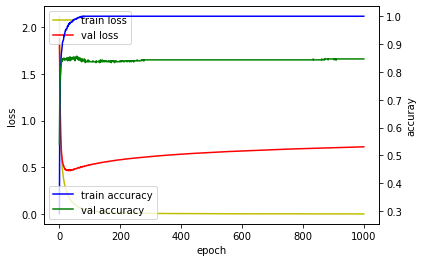

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(custom_hist.train_loss, 'y', label='train loss')
loss_ax.plot(custom_hist.val_loss, 'r', label='val loss')

acc_ax.plot(custom_hist.train_accuracy, 'b', label='train accuracy')
acc_ax.plot(custom_hist.val_accuracy, 'g', label='val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 6. 학습과정 살펴보기
* 모델 학습 시 훈련셋, 검증셋의 손실 및 정확도를 측정합니다.
* 반복횟수에 따른 손실 및 정확도 추이를 보면서 학습 상황을 판단합니다.

In [11]:
print('## training loss and accuracy ##')
print(custom_hist.train_loss)
print(custom_hist.train_accuracy)

## training loss and accuracy ##
[2.117650886944362, 1.6587995971952165, 1.3006489438670021, 1.0464512935706547, 0.877866416318076, 0.7573445524488177, 0.6697238100426538, 0.6019458821841649, 0.5499057780419078, 0.5060170429093497, 0.47003546101706367, 0.44050561445099967, 0.41185048605714525, 0.3882762002093451, 0.36766962866697994, 0.34968262027416913, 0.3319906126175608, 0.3176537385476487, 0.3020437643464122, 0.2893943853676319, 0.2762876182794571, 0.26602822196270737, 0.25445520845907077, 0.24482060543128423, 0.23543151925717082, 0.22686701427612985, 0.21797953942524537, 0.21066563352942466, 0.20210037311272963, 0.1958972382758345, 0.18829816867198262, 0.18149129764309951, 0.1756188369755234, 0.16993286269051688, 0.16556712721607514, 0.15963602332132204, 0.1540672748748745, 0.14957480680729662, 0.14486347881278822, 0.1405850986284869, 0.13626178058662586, 0.13189671632966826, 0.12842816944633212, 0.12407024492110524, 0.1207930227741599, 0.11714347643511636, 0.11368185899087362, 0.

### 7. 모델 평가하기
* 준비된 시험셋으로 학습한 모델을 평가합니다.
* 케라스에서는 evaluate() 함수를 사용합니다.

In [12]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

10000/10000 [==============================] - 0s 47us/sample - loss: 0.5491 - accuracy: 0.8809
## evaluation loss and_metrics ##
[0.5490633637011051, 0.8809]


### 8. 모델 사용하기
* 임의의 입력으로 모델의 출력을 얻습니다.
* 케라스에서는 predict() 함수를 사용합니다.

In [13]:
xhat = X_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)

## yhat ##
[[4.52819393e-10 8.51478583e-14 2.45852161e-09 2.96720509e-10
  1.01207244e-13 3.06339459e-12 6.65554656e-15 1.00000000e+00
  1.82896510e-11 2.93531368e-08]]


### 9. 러닝 모델 가시화 기능 확인

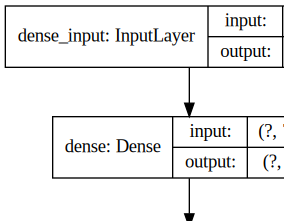

In [14]:
import pydot
import graphviz
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

### 10. 모델 저장과 모델 로딩 

In [ ]:
from tensorflow.keras.models import load_model

model.save('mnist_mlp_model.h5')
model = load_model('mnist_mlp_model.h5')